In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from PIL import Image

#Escolhendo GPU: no caso de rodar no srv multigpu, escolher 0 ou 1
#Não pareceu funcionar
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

#Reports
from sklearn.metrics import classification_report, confusion_matrix
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
vgg16_model=keras.applications.vgg16.VGG16(weights='imagenet',include_top=False)

In [3]:
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
preds = Dense(2,activation='softmax')(x)

In [4]:
model = Model(inputs=vgg16_model.input,output=preds)

In [5]:
BATCH_SIZE = 32
TRAINING_DIR = '/home/jailsonpereira/paic/dataset_2/treino/'

In [6]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.1)

train_generator=data_generator.flow_from_directory(TRAINING_DIR,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True,subset='training')

validation_generator=data_generator.flow_from_directory(TRAINING_DIR,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True,subset='validation')

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

Found 1080 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [7]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=["accuracy"])

In [8]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='CNN_Ince_aval_6.0_best_model.h5', #.{epoch:02d}-{val_loss:.2f}
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

In [9]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=200,
        callbacks=callbacks_list,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/200
33/33 [==============================] - 20s 604ms/step - loss: 7.8281 - acc: 0.4981 - val_loss: 7.8912 - val_acc: 0.5104

Epoch 00001: val_loss improved from inf to 7.89115, saving model to CNN_Ince_aval_6.0_best_model.h5
Epoch 2/200
33/33 [==============================] - 19s 569ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.2422 - val_acc: 0.4886

Epoch 00002: val_loss did not improve from 7.89115
Epoch 3/200
33/33 [==============================] - 20s 606ms/step - loss: 8.1201 - acc: 0.4962 - val_loss: 8.7917 - val_acc: 0.4545

Epoch 00003: val_loss did not improve from 7.89115
Epoch 4/200
33/33 [==============================] - 19s 578ms/step - loss: 7.9630 - acc: 0.5060 - val_loss: 7.3264 - val_acc: 0.5455

Epoch 00004: val_loss improved from 7.89115 to 7.32641, saving model to CNN_Ince_aval_6.0_best_model.h5
Epoch 5/200
33/33 [==============================] - 19s 581ms/step - loss: 8.1969 - acc: 0.4914 - val_loss: 8.7306 - val_acc: 0.4583

Epoch 00005: val_lo

33/33 [==============================] - 19s 590ms/step - loss: 7.9059 - acc: 0.5095 - val_loss: 7.6927 - val_acc: 0.5227

Epoch 00044: val_loss did not improve from 6.59377
Epoch 45/200
33/33 [==============================] - 19s 562ms/step - loss: 7.8049 - acc: 0.5158 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00045: val_loss did not improve from 6.59377
Epoch 46/200
33/33 [==============================] - 20s 607ms/step - loss: 8.3132 - acc: 0.4842 - val_loss: 8.4254 - val_acc: 0.4773

Epoch 00046: val_loss did not improve from 6.59377
Epoch 47/200
33/33 [==============================] - 19s 575ms/step - loss: 8.2068 - acc: 0.4908 - val_loss: 8.2422 - val_acc: 0.4886

Epoch 00047: val_loss did not improve from 6.59377
Epoch 48/200
33/33 [==============================] - 19s 571ms/step - loss: 7.7995 - acc: 0.5161 - val_loss: 7.5096 - val_acc: 0.5341

Epoch 00048: val_loss did not improve from 6.59377
Epoch 49/200
33/33 [==============================] - 18s 550ms/step - loss: 8

### FALTA AVALIAR

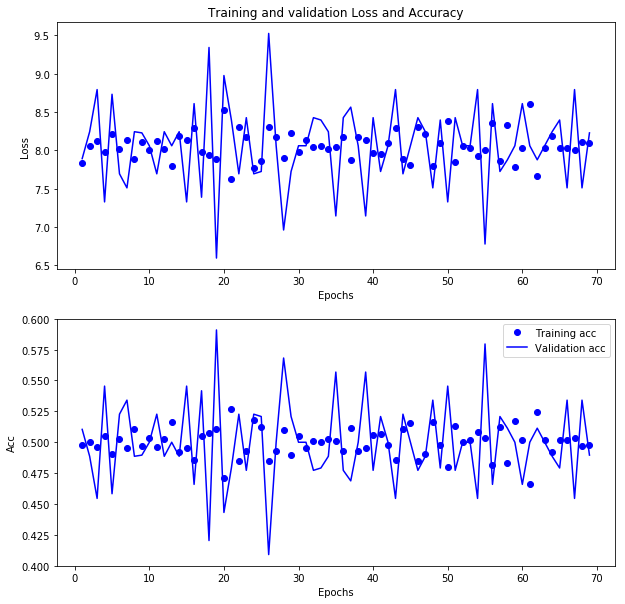

In [11]:
#Visualização do treino
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [25]:
loss_values[116]

7.966768577808642

# Avaliação

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
model = load_model('CNN_Ince_aval_6.0_best_model.h5')

In [17]:
test_dir = '../dataset_2/teste'
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

Found 400 images belonging to 2 classes.


In [18]:
predict = model.predict_generator(test_generator,steps = nb_samples)

In [19]:
y_pred = np.argmax(predict,axis=1)


In [20]:
len(y_pred)

400

In [21]:
print(confusion_matrix(test_generator.classes,y_pred))

[[  0 200]
 [  0 200]]


In [22]:
#!pip install seaborn

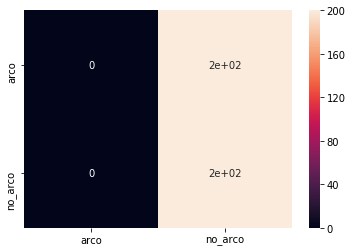

In [23]:
#Confusion MKatrix
import seaborn as sns
classes = 'arco no_arco'.split()
sns.heatmap(confusion_matrix(test_generator.classes,y_pred),annot=True, xticklabels=classes, yticklabels=classes)

In [24]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=classes))

Classification Report
              precision    recall  f1-score   support

        arco       0.00      0.00      0.00       200
     no_arco       0.50      1.00      0.67       200

   micro avg       0.50      0.50      0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



In [25]:
#t_ini = time.time()
#y_pred = model.predict_generator(x_test)
#t_fim = time.time()
print("Total de exemplos: "+ str(len(test_generator)))
#print("Tempo por exemplo: "+str((t_fim - t_ini)/len(x_test)))

#model.predict_generator(test_generator,steps = nb_samples)

score = model.evaluate_generator(test_generator, steps = nb_samples)
print('Loss de Teste:', score[0])
print('Acurácia de Teste:', score[1])

Total de exemplos: 400
Loss de Teste: 8.059047758579261
Acurácia de Teste: 0.5


In [20]:
score = history.model.evaluate_generator(train_generator,steps=nb_train_samples)